# Sanity Check: MNIST Activation Loss

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

In [2]:
def plot_acc(exp_id):
    filename = '%s/%s-val-accuracy.pkl' % (exp_id, exp_id)
    with open(filename, 'rb') as f:
        accs = pickle.load(f)
    plt.plot(range(len(accs)), accs)
    plt.show()

In [3]:
def load_pkl(fname):
    with open(fname, 'rb') as f:
        return pickle.load(f)

In [4]:
anchor = (0.65, 0.43)
def plot_overlay(metric, *exp_ids, rang=None):
    all_lines = []
    for exp_id in exp_ids:
        filename = '%s/%s-%s.pkl' % (exp_id, exp_id, metric)
        with open(filename, 'rb') as f:
            accs = pickle.load(f)
            if rang is not None:
                accs = accs[rang[0]:rang[1]]
        all_lines += [plt.plot(range(len(accs)), accs, label=exp_id)[0]]
    all_labels = [l.get_label() for l in all_lines]
    plt.title(metric)
    plt.legend(all_lines, all_labels, bbox_to_anchor=anchor,
               loc=2, borderaxespad=0., fancybox=True, framealpha=0.7,
               fontsize=18, numpoints=1)
    plt.show()


### ReLU - Sigmoid Comparison

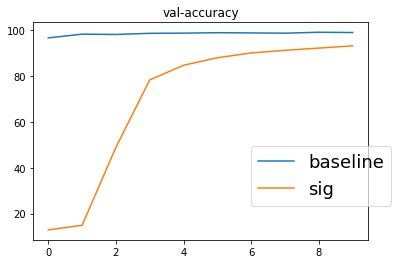

In [39]:
plot_overlay('val-accuracy', 'baseline', 'sig')

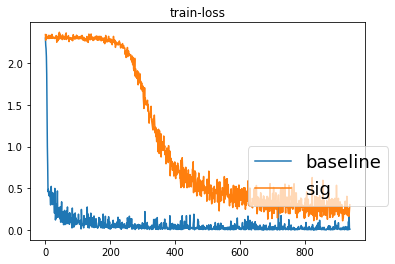

In [40]:
plot_overlay('train-loss', 'baseline', 'sig')

### Sigmoid Activation

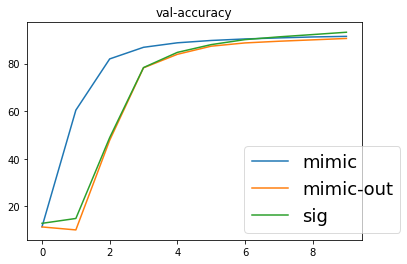

In [35]:
plot_overlay('val-accuracy', 'mimic', 'mimic-out', 'sig')

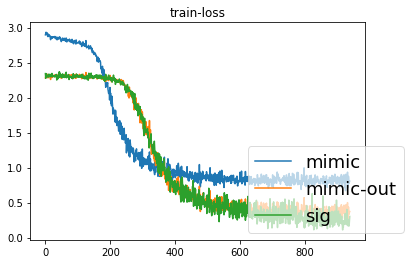

In [36]:
plot_overlay('train-loss', 'mimic', 'mimic-out', 'sig')

### ReLU Activation - BCE loss on activations

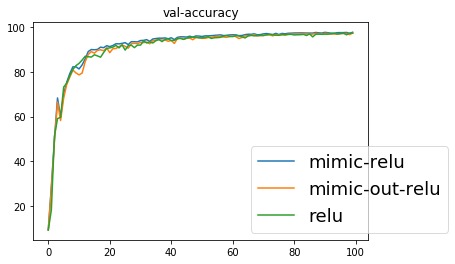

In [5]:
plot_overlay('val-accuracy', 'mimic-relu', 'mimic-out-relu', 'relu', rang=(0,100))

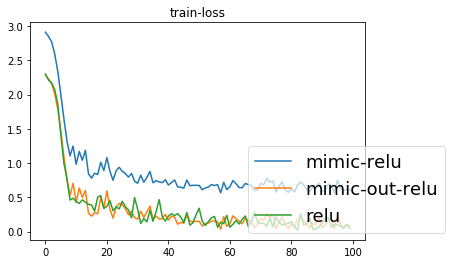

In [7]:
plot_overlay('train-loss', 'mimic-relu', 'mimic-out-relu', 'relu', rang=(0,100))

### ReLU Activation - MSE loss on activations

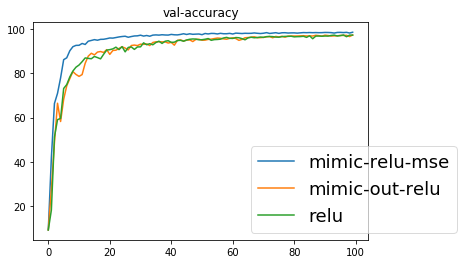

In [8]:
plot_overlay('val-accuracy', 'mimic-relu-mse', 'mimic-out-relu', 'relu', rang=(0,100))

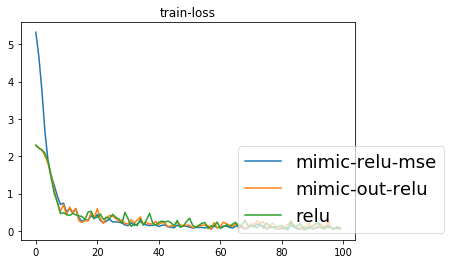

In [9]:
plot_overlay('train-loss', 'mimic-relu-mse', 'mimic-out-relu', 'relu', rang=(0,100))